# Data Analysis:  Finding the best markets to advertise in to promote our e-learning products to a wide prospects.

> Our company is into e-learning that offers courses on 
> programming. Most of our courses are on web and mobile 
> development, but we also cover many other domains, like data 
> science, game development, etc. We want to promote our product 
> and we'd like to invest some money in advertisement.
>
> Our goal in this project is to find out the two best markets to 
> advertise our product in to get the best results for our 
> promotion.

### Our Plan of Action to execute our goal

> To reach our goal, one way is we could organize surveys for a 
> couple of different markets to find out which would be the best 
> choices for advertising. This is very costly, however, and it's 
> a good call to explore cheaper options first.
>
> We can try to search existing data that might be relevant for 
> our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](<https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969>). 
> *freeCodeCamp* is a free e-learning platform that offers 
> courses on web development. Because they run a popular [Medium publication](<https://medium.freecodecamp.org/>) (over 400,000 
> followers), their survey attracted new coders with varying 
> interests (not only web development), which is ideal for the 
> purpose of our analysis.
> 
> The survey data is publicly available in [this GitHub repository.](<https://github.com/freeCodeCamp/2017-new-coder-survey>)

In [1]:
# Reading in the '2017-fCC-New-Coders-Survey-Data.csv' file 
# and explore briefly the data set.

In [2]:
import pandas as pd

In [3]:
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
survey_df = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning
pd.options.display.max_columns = 150
survey_df.shape

(18175, 136)

In [4]:
survey_df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [5]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [6]:
survey_df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,297.0,1977.0,2472.0,446.0,1076.0,133.0,132.0,544.0,547.0,481.0,1753.0,7200.000000,3833.000000,4508.000000,3858.000000,15291.000000,15329.000000,15380.000000,6397.000000,15256.000000,6402.000000,1371.000000,16714.000000,7623.000000,15293.000000,15222.000000,18068.000000,9223.000000,3201.0,1470.0,1940.0,1092.0,4047.0,4831.0,1875.0,1560.0,2677.0,939.0,584.0,1691.0,6503.000000,16577.000000,17084.000000,403.0,1636.0,773.0,728.0,327.0,187.0,726.0,1123.0,1061.0,345.0,333.0,790.0,408.0,318.0,655.0,311.0,9390.0,1848.0,4402.0,4671.0,3243.0,1341.0,13803.0,2049.0,3800.0,2558.0,6417.0,976.0,2392.0,452.0,11207.0,2260.0,3837.0,5120.0,9765.0,3362.000000,956.0,976.0,1397.0,1453.0,1847.0,2619.0,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56169.169306,0.227498,0.572981,0.609383,0.420901,0.252463,0.854811,0.269970,0.075511,0.568416,166541.105033,15.609250,43169.357864,0.238083,0.024241,0.250609,0.434674,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.771644,957.299753,20.790447,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31602.625521,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74811.725422,0.419271,0.494700,0.487952,0.493720,0.434439,0.352302,0.443979,0.264223,0.495336,137761.450348,15.283681,61812.293272,0.425924,0.153802,0.433376,0.495741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419806,5003.003169,41.722826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39383.187732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [7]:
survey_df.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

> From all the above columns we need to sort out relevant columns 
> for the purpose of our analysis.
>
> As we mentioned earlier, most of the courses we offer are on 
> web and mobile development, but we also cover many other 
> domains, like data science, game development, etc. For the 
> purpose of our analysis, we want to answer questions about a 
> population of new coders that are interested in the subjects we 
> teach. We'd like to know:
>
> * Where are these new coders located.
> * What are the locations with the greatest number of new coders.
> * How much money new coders are willing to spend on learning.
>
> Before starting to analyze the sample data we have, we need to 
> clarify whether it's representative for our population of 
> interest and it has the right categories of people for our 
> purpose.
>
> For this we can explore the `JobRoleInterest` column that 
> describes for every participant the role(s) they'd be
> interested in working in. So if a participant is interested in 
> a certain job role it means that they will also need and would 
> want to get expertise in the same. So lets explore this column
> first.

In [8]:
# Taking percentages instead of absolute frequencies.
survey_df['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                         11.770595
  Front-End Web Developer                                                                                                                         6.435927
  Data Scientist                                                                                                                                  2.173913
Back-End Web Developer                                                                                                                            2.030892
  Mobile Developer                                                                                                                                1.673341
                                                                                                                                                   ...    
  User Experience Designer,   Data Scientist,   DevOps / SysAdmin, Inf

> The output of above code shows there are job roles that are 
> repeated many times in different ways. Anyhow we can figure out 
> that most people are interested in web development (full-stack 
> web development, front-end web development and back-end web 
> development), then comes Data Scientist, Mobile Developer, Game 
> Developer and others. We also find that there are people 
> interested in two or more different job roles too.

> Let us get a more precise picture of this column.

In [9]:
series_jobrole = survey_df['JobRoleInterest'].dropna()
series_jobrole = series_jobrole.str.split(',')
print(series_jobrole)

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
                               ...                        
18161                           [Full-Stack Web Developer]
18162    [  Data Scientist,  Game Developer,    Quality...
18163    [Back-End Web Developer,  Data Engineer,    Da...
18171    [  DevOps / SysAdmin,    Mobile Developer,    ...
18174    [Back-End Web Developer,  Data Engineer,    Da...
Name: JobRoleInterest, Length: 6992, dtype: object


In [10]:
# sorting out people based no number of job roles 
# they are interested in.
series_numberofjobroles = series_jobrole.apply(lambda x: len(x))
round(series_numberofjobroles.value_counts(normalize = True).sort_index() * 100, 2)

1     31.65
2     10.88
3     15.89
4     15.22
5     12.04
6      6.72
7      3.86
8      1.76
9      0.99
10     0.47
11     0.19
12     0.30
13     0.03
Name: JobRoleInterest, dtype: float64

> As we can see from our code output that 31.65 percentage are 
> interested in one job role. While others are interested in 2 to 
> 13 different job roles at a go which amounts to 68.35 
> percentage.

> Now the question arises that since if most people are 
> interested in more than one subject, is this sample still 
> representative for our population of interest?
>
> The focus of our courses is on web and mobile development. How 
> many people are interested in at least one of these two 
> subjects?
> 
> Because our goal is to find the two best markets to advertise 
> in to promote our e-learning products to a wide prospects. And 
> since most of our courses are on Web Development and Mobile 
> Development, so Focusing on what matter most to us the best solution for answering both our above questions would be to: 
>
> * Take into consideration the higher percentage that is 68.35% 
> which accounts for datapoints/records in this column having 
> people interested in more than one job role and find out 
> whether at least one of these two Web Developer or Mobile 
> Developer job role are in demand here and if it so then we can 
> strongly consider this sample representative for our population 
> of interest since we are considering the major percentage and 
> in doing so through the calculation of frequency of demand for 
> these job roles we can also get the answer to our second 
> questions that is to know how many are interested.

In [11]:
series_subject = survey_df['JobRoleInterest'].dropna()

In [12]:
subject_interests = series_subject.str.contains('Web Developer|Mobile Developer')
freq_subjectinterest = round(subject_interests.value_counts(normalize = True) * 100, 2)
print(freq_subjectinterest)

True     86.24
False    13.76
Name: JobRoleInterest, dtype: float64


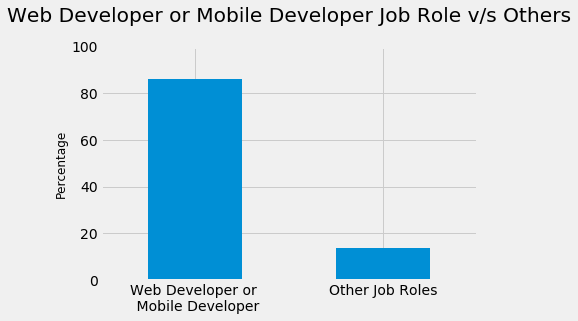

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

freq_subjectinterest.plot.bar()
plt.title('Web Developer or Mobile Developer Job Role v/s Others',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web Developer or \n Mobile Developer', 'Other Job Roles'],
           rotation = 0)
# in our above code True represents for Web Developer or
# Mobile Developer and False for Other Job Roles.
plt.ylim([0,100])
plt.show()

> As seen in above output we have 86.24 percentage demand in Web 
> Developer or Mobile Developer job role. And since as mentioned 
> earlier most of our courses are on Web Development and Mobile 
> Development we can indeed strongly consider this sample 
> representative for our population of interest 

> Now that we found out that the sample has the right categories 
> of people for our purpose, we can begin analyzing it further. 
> We can start with finding out 
> * where these new coders are located? 
> * what are the densities (how many coderes there are) for each 
> location? 

> The data set provides information about the location of each 
> participant at a country level. The `CountryCitizen` variable 
> describes the country of origin for each participant, and the 
> `CountryLive` variable describes what country each participants 
> lives in (which may be different than the origin country). 
> 
> For our analysis, we'll work with the `CountryLive` variable 
> because we're interested where people actually live at the 
> moment when we run the ads. In other words, we're interested 
> where people are located, not where they were born.
>
> Because the data set provides information at a country level, 
> we can think of each country as an individual market. This 
> means we can frame our goal as finding the two best countries 
> to advertise in.
>
> One indicator of a good market is the number of potential 
> customers — **the more potential customers in a market, the 
> better.** *That is if our ads manage to convince 10% of the 
> 5000 potential customers in market A to buy our product, then 
> this is better than convincing 100% of the 30 potential 
> customers in market B.*

In [14]:
# Generating both absolute and relative frequencies table 
# for the CountryLive variable

In [15]:
# Selecting only records where 'JobRoleInterest' was answered by 
# participants so that we get clean records to know the countries 
# to focus on as per our goal requirement. All the countries for
# any subjects to get two best countries to advertise in
# for our potential prospects. 
  
clean_df = survey_df[survey_df['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolutefrq = clean_df['CountryLive'].value_counts()
relativefrq = round(clean_df['CountryLive'].value_counts(normalize = True) * 100, 2)

# Display the frequency tables in a more readable format
countries = pd.DataFrame(data = {'Absolute frequency': absolutefrq, 
                     'Percentage': relativefrq}
            )
countries

,Absolute frequency,Percentage
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
...,...,...
Liberia,1,0.01
Panama,1,0.01
Yemen,1,0.01
Jordan,1,0.01


> Our output shows USA is the best country where we can advertise 
> as it has more potential prospects who are interested in such 
> job role, thus more likely they are searching for some courses 
> to enhance, polish and upgrad their skills to avail the job. 
> Second in line is India followed by United Kingdom and Canada.
>
> So based on the results, the two countries we would choose as 
> potential market for advertisement are:
>
> * United States of America
> * India

> This is useful information, but we need to go more in depth 
> with our analysis before taking a decision. The next important 
> factor to consider now is to figure out how much money the 
> potential prospects are actually willing to spend on learning. 
> As advertising within markets where most people are only 
> willing to learn for free is extremely unlikely to be 
> profitable for us.

> Here the `MoneyForLearning` column can aid us in our further 
> analysis.
>
> * It describes in American dollars the amount of money spent by 
> participants from the moment they started coding until the 
> moment they completed the survey. Our company sells 
> subscriptions at a price of \\$59 per month, and for this 
> reason we're interested in finding out how much money each 
> student spends per month.
>
> It also seems like a good idea to narrow down our analysis to 
> only four countries: the US, India, the United Kingdom, and 
> Canada. Two reasons for this decision are:
>
> * These are the countries having the highest absolute 
> frequencies in our sample, which means we have a decent amount 
> of data for each. 
> * Our courses are written in English, and English is an 
> official language in all these four countries. The more people 
> that know English, the better our chances to target the right 
> people with our ads.

> To get started with our next analysis we will be creating a new 
> column `FeesPerMonth`, which describes the amount of money a student has spent 
> per month (at the moment they completed the survey). 

> Here since to get the value for the above mentioned new column 
> we'll need to divide the `MoneyForLearning` column to the 
> `MonthsProgramming` column. Here the problem is that some 
> students answered that they have been learning to code for 0 
> months (it might be that they had just started when they 
> completed the survey). To avoid dividing by 0, we'll replace 0 
> with 1 in the `MonthsProgramming` column.

In [16]:
clean_df['MonthsProgramming'].replace(0 , 1, inplace = True)

In [17]:
clean_df['MoneyForLearning'].isnull().sum()

516

In [18]:
clean_df['MonthsProgramming'].isnull().sum()

359

In [19]:
# Selecting only records where the participants have given answers
# for both MoneyForLearning column and MonthsProgramming column
# to get more precise output we are also selecting only records
# where CountryLive column is being answered.

clean_df2 = clean_df[clean_df['MoneyForLearning'].notnull() & clean_df['MonthsProgramming'].notnull() & clean_df['CountryLive'].notnull()].copy()
clean_df2.shape

(6212, 136)

In [20]:
clean_df2['FeesPerMonth'] = clean_df2['MoneyForLearning'] / clean_df2['MonthsProgramming']
# find the frequency with respect to CountryLive column
clean_df2['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

> From above output we still see USA holding top position though 
> there is a drop of absolute frequency value from 3125 to 2933. 
> The same holds true for other 3 countries India, United Kingdom 
> and Canada, each holding their previous position in our new 
> dataset which has lots of cleanup and new column 
> `FeesPerMonth`.

> Now let us find out how much amount a student spends on average 
> each month on his studies in the US, India, the United Kingdom 
> and Canada.

In [21]:
avgfeeamt = clean_df2.groupby('CountryLive').mean()

In [22]:
medianfeeamt = clean_df2.groupby('CountryLive').median()

In [23]:
from scipy.stats import mode 

In [24]:
modefeeamt =clean_df2.groupby('CountryLive')['FeesPerMonth'].agg(lambda x: mode(x)[0])

In [25]:
selectedavgfeeamt = avgfeeamt['FeesPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
selectedavgfeeamt

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: FeesPerMonth, dtype: float64

In [26]:
selectedmedianfeeamt = medianfeeamt['FeesPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
selectedmedianfeeamt

CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: FeesPerMonth, dtype: float64

In [27]:
modefeeamt

CountryLive
Afghanistan                 0.000000
Albania                     0.000000
Algeria                     0.000000
Angola                    116.666667
Anguilla                    0.000000
                            ...     
Venezuela                   0.000000
Vietnam                     0.000000
Virgin Islands (USA)        0.000000
Yemen                   10000.000000
Zimbabwe                    0.000000
Name: FeesPerMonth, Length: 131, dtype: float64

In [28]:
selectedmodefeeamt= modefeeamt[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
selectedmodefeeamt

CountryLive
United States of America    0.0
India                       0.0
United Kingdom              0.0
Canada                      0.0
Name: FeesPerMonth, dtype: float64

In [29]:
import numpy as np
tempdf = pd.DataFrame(data=[selectedavgfeeamt, selectedmedianfeeamt, selectedmodefeeamt],
                     index=['mean', 'median', 'mode'])                  
                     
tempdf

CountryLive,United States of America,India,United Kingdom,Canada
mean,227.997996,135.100982,45.534443,113.510961
median,3.333333,0.000000,0.000000,0.000000
mode,0.000000,0.000000,0.000000,0.000000


> The results for the United Kingdom and Canada are surprisingly 
> low relative to the values we see for India. If we considered a 
> few socio-economical metrics (like GDP per capita), we'd 
> intuitively expect people in the UK and Canada to spend more on 
> learning than people in India.
>
> It might be that we don't have enough representative data 
> for the United Kingdom, Canada, and India, or we have some 
> outliers (maybe coming from wrong survey answers) making the 
> mean too big for India, or too low for the UK and Canada. Or it 
> might be that the results are correct.

In [30]:
# Generating four box plots on the same figure to visualize 
# for each country (US, India, United Kingdom, Canada) 
# the distribution of the FeesPerMonth variable that describes 
# how much money each participant had spent per month

In [31]:
feespercountry = clean_df2[clean_df2['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
feespercountry.groupby('CountryLive')['FeesPerMonth'].value_counts()

CountryLive               FeesPerMonth
Canada                    0.000000        126
                          25.000000         6
                          20.000000         5
                          33.333333         5
                          50.000000         5
                                         ... 
United States of America  12500.000000      1
                          14000.000000      1
                          16666.666667      1
                          50000.000000      1
                          80000.000000      1
Name: FeesPerMonth, Length: 577, dtype: int64

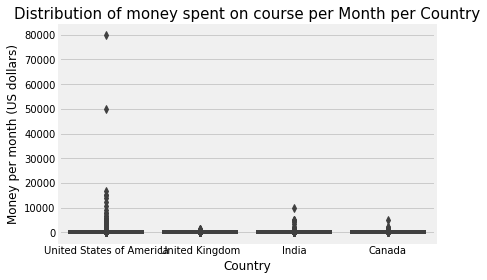

In [32]:
import seaborn as sns
sns.boxplot(y = 'FeesPerMonth', x = 'CountryLive',
            data = feespercountry)
plt.title('Distribution of money spent on course per Month per Country',
         fontsize = 15)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

> In the above plot we can see for USA two outliers distinctly 
> of \\$50000 or more money spend for learning.

> Being an Indain, it do seems for me that 10000 USA dollars is an outlier.

> For UK and Canada there is no distinct outliers.

> Since for USA we see outliers above 20000, let us recompute the 
> mean values by removing every value that goes over \\$20,000 
> per month.

In [33]:
clean_df2 = clean_df2[clean_df2['FeesPerMonth'] < 20000]

In [34]:
avgfeeamt2 = clean_df2.groupby('CountryLive').mean()

In [35]:
selectedavgfeeamt2 = avgfeeamt2['FeesPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
selectedavgfeeamt2

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: FeesPerMonth, dtype: float64

In [36]:
feespercountry2 = clean_df2[clean_df2['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
feespercountry2.groupby('CountryLive')['FeesPerMonth'].value_counts()

CountryLive               FeesPerMonth
Canada                    0.000000        126
                          25.000000         6
                          20.000000         5
                          33.333333         5
                          50.000000         5
                                         ... 
United States of America  9000.000000       1
                          10833.333333      1
                          12500.000000      1
                          14000.000000      1
                          16666.666667      1
Name: FeesPerMonth, Length: 575, dtype: int64

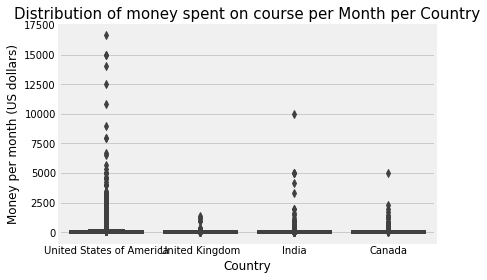

In [37]:
import seaborn as sns
sns.boxplot(y = 'FeesPerMonth', x = 'CountryLive',
            data = feespercountry2)
plt.title('Distribution of money spent on course per Month per Country',
         fontsize = 15)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

> Now we see some outliers distinctly. 

> Let us remove outliers we see above and move a bit closer to our goal.
> Starting with India. Here we see outliers from \\$2500

In [38]:
# Inspecting the outliers we see in India
india_outliers = clean_df2[
    (clean_df2['CountryLive'] == 'India') & 
    (clean_df2['FeesPerMonth'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,FeesPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,N

> As seen above this is indeed an outlier in the records of 
> participants from India although the `FeesPerMonth` is filled 
> but they haven't filled any details in BootCamp columns for
> informations.
>
> These records gives us no information relevant for our analysis 
> so we can drop these records.

In [39]:
# Remove the outliers for India
clean_df2 = clean_df2.drop(india_outliers.index) # using the row labels

> For USA we see outliers from \\$6000 and above onwards

In [40]:
# Inspecting the outliers we see in USA
us_outliers = clean_df2[
    (clean_df2['CountryLive'] == 'United States of America') & 
    (clean_df2['FeesPerMonth'] >= 6000)]

us_outliers.shape

(11, 137)

In [41]:
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,FeesPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

> We have 11 records, of which 6 partipants have attended some 
> bootcamps, and may be they have spend their money as a fees for 
> the course. For other 5 records are indeed an outlier in the 
> records of participants from USA although the `FeesPerMonth` is 
> filled but they haven't filled any details in BootCamp columns 
> for informations.
>
> These 5 records gives us no information relevant for our 
> analysis so we can drop these 5 records.

In [42]:
bootcamp_noinfo = clean_df2[
    (clean_df2['CountryLive'] == 'United States of America') & 
    (clean_df2['FeesPerMonth'] >= 6000) &
    (clean_df2['AttendedBootcamp'] == 0)
]

clean_df2 = clean_df2.drop(bootcamp_noinfo.index)


In [43]:
# to find any more outliers in our records for USA
us_outliers = clean_df2[
    (clean_df2['CountryLive'] == 'United States of America') & 
    (clean_df2['FeesPerMonth'] >= 6000)]

us_outliers.shape

(6, 137)

In [44]:
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,FeesPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

> In the above output we see 6 records of the participants shows 
> that they had been programming for no more than three months 
> when they completed the survey. So the exceptionally high money 
> mentioned as fees for the course seems a bit unrealistic or may 
> be they have mentioned the full fees amount. So it is outliers 
> as per the information requirement. So for the relevant of our 
> analysis we can drop these records too.

In [45]:
clean_df2 = clean_df2.drop(us_outliers.index)

In [46]:
# to find any more outliers in our records for USA
us_outliers = clean_df2[
    (clean_df2['CountryLive'] == 'United States of America') & 
    (clean_df2['FeesPerMonth'] >= 6000)]

us_outliers.shape

(0, 137)

> For Canada we see outliers above \\$4000

In [47]:
canada_outliers = clean_df2[
    (clean_df2['CountryLive'] == 'Canada') & 
    (clean_df2['FeesPerMonth'] > 4000)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,FeesPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


> In the above output we see the participants had been 
> programming for two months when they completed the survey. Same 
> as USA records we saw above, this seems exceptionally high 
> money mentioned as fees for the course and thus a bit 
> unrealistic or may be they have mentioned the full fees amount. 
> So it is outliers as per the information requirement. So for 
> the relevant of our analysis we can drop this record.

In [48]:
clean_df2 = clean_df2.drop(canada_outliers.index)

In [49]:
uk_outliers = clean_df2[
    (clean_df2['CountryLive'] == 'United Kingdom') & 
    (clean_df2['FeesPerMonth'] > 0)]

uk_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,FeesPerMonth
22,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Portugal,United Kingdom,software development and IT,NaN,Employed for wages,NaN,48600.0,0.0,NaN,female,NaN,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,5.0,9d14d7e88d3bb03fa51d49b53b923596,335f504943d112779366ea89ace235cf,46700.0,0.0,0.0,0.0,1.0,I haven't decided,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,1.0,Full-Stack Web Developer,in an office with other developers,Portuguese,"single, never married",4000.0,14.0,51887f00cd,2017-03-09 01:14:44,2017-03-09 01:10:27,2017-03-09 01:18:37,2017-03-09 01:14:47,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,master's degree (non-professional),Electrical and Electronics Engineering,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,285.714286
133,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United Kingdom,United Kingdom,office and administrative support,NaN,Employed for wages,NaN,NaN,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,200000.0,15.0,6a15985d066d699658657813e33f207c,4c37750d6a1c00657970c0d692fb641e,19000.0,0.0,0.0,0.0,1.0,I'm already applying,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,0.0,"Data Scientist, DevOps / SysAdmin, Front...",no preference,English,married or domestic partnership,850.0,24.0,738f13c26e,2017-03-09 07:50:10,2017-03-09 07:48:14,2017-03-09 07:52:05,2017-03-09 07:50:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Na

In [50]:
uk_outliers['BootcampName'].value_counts()

CodeClan            2
General Assembly    1
Makers Academy      1
Name: BootcampName, dtype: int64

In [51]:
uk_outliers['AttendedBootcamp'].value_counts()

0.0    132
1.0      5
Name: AttendedBootcamp, dtype: int64

> As we see in above records 132 records are indeed an outlier in 
> the records of participants from United Kingdom. ALthough the 
> `FeesPerMonth` is filled but they haven't filled any details in 
> BootCamp columns for informations.
>
> These 132 records gives us no information relevant for our 
> analysis so we can drop these 132 records.

In [52]:
bootcamp_noinfouk = clean_df2[
    (clean_df2['CountryLive'] == 'United Kingdom') & 
    (clean_df2['AttendedBootcamp'] == 0)
]
clean_df2 = clean_df2.drop(bootcamp_noinfouk.index)

In [53]:
uk_outliers = clean_df2[
    (clean_df2['CountryLive'] == 'United Kingdom') & 
    (clean_df2['FeesPerMonth'] > 0)]

uk_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,FeesPerMonth
4462,25.0,1.0,1.0,0.0,CodeClan,1.0,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United Kingdom,United Kingdom,software development and IT,NaN,Employed for wages,NaN,28000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,50.0,641c1976b643d35913f955f8ab6f64a1,225465c60f50dfadaa50d876828850e6,16000.0,0.0,0.0,0.0,0.0,I haven't decided,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,0.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",5000.0,14.0,46b3a3a6ed,2017-03-14 10:05:43,2017-03-14 10:02:50,2017-03-14 10:07:44,2017-03-14 10:05:47,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,5000.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357.142857
6127,23.0,1.0,1.0,1.0,General Assembly,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slovakia,United Kingdom,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,f0e81c452041f52c3de4a32961a8de03,edff84bd0e257c32be2b54341d03ed21,NaN,0.0,0.0,0.0,NaN,I'm already applying,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,0.0,"Full-Stack Web Developer, Front-End Web Deve...",no preference,Slovak,"single, never married",10000.0,8.0,e0a09cc88d,2017-03-19 13:45:28,2017-03-19 13:41:54,2017-03-19 13:47:01,2017-03-19 13:45:32,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,high school diploma or equivalent

In [54]:
uk_outliers['FeesPerMonth'].value_counts()

307.692308     1
13.888889      1
1400.000000    1
357.142857     1
1250.000000    1
Name: FeesPerMonth, dtype: int64

In [55]:
uk_outliers['MonthsProgramming'].value_counts()

52.0    1
5.0     1
36.0    1
8.0     1
14.0    1
Name: MonthsProgramming, dtype: int64

> The rest of records of United Kingdom we are keeping with a 
> belief that the participants may have provided right 
> information only.

In [56]:
# Recompute mean by sum of money spent on course by students 
# each month

In [57]:
avgfeeamt3 = clean_df2.groupby('CountryLive').mean()
avgfeeamt3

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,FeesPerMonth
CountryLive,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,18.750000,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,433500.000000,0.000,NaN,0.00,0.333333,0.500000,0.250000,0.000000,0.250000,1.000000,NaN,22.750000,NaN,0.750000,0.250000,0.0,1.000000,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,0.333333,0.000000,16.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
Albania,20.666667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28833.333333,0.000,NaN,0.00,0.000000,0.333333,0.833333,NaN,0.000000,NaN,NaN,19.333333,62400.0,0.000000,0.000000,0.0,1.000000,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.000000,252.000000,14.333333,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,7.111111
Algeria,23.750000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,26133.333333,NaN,NaN,NaN,0.000000,0.000000,0.250000,NaN,0.000000,NaN,NaN,15.750000,12000.0,0.000000,0.000000,0.0,0.000000,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.000000,0.000000,10.250000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.000000
Angola,20.000000,0.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,14400.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,6.000000,NaN,1.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.000000,700.000000,6.000000,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,116.666667
Anguilla,25.000000,NaN,NaN,NaN

In [58]:
selectedavgfeeamt3 = avgfeeamt3['FeesPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
round(selectedavgfeeamt3, 2)

CountryLive
United States of America    142.65
India                        65.76
United Kingdom              475.53
Canada                       93.07
Name: FeesPerMonth, dtype: float64

In [59]:
feespercountry3 = clean_df2[clean_df2['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
feespercountry3.groupby('CountryLive')['FeesPerMonth'].value_counts()

CountryLive               FeesPerMonth
Canada                    0.000000        126
                          25.000000         6
                          20.000000         5
                          33.333333         5
                          50.000000         5
                                         ... 
United States of America  4500.000000       1
                          4550.000000       1
                          4666.666667       1
                          5333.333333       1
                          5666.666667       1
Name: FeesPerMonth, Length: 496, dtype: int64

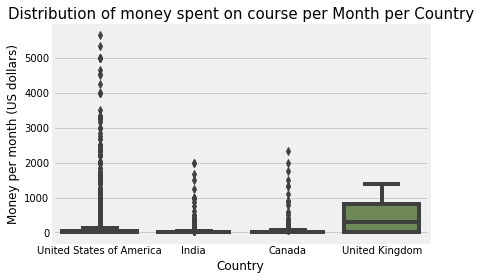

In [60]:
import seaborn as sns
sns.boxplot(y = 'FeesPerMonth', x = 'CountryLive',
            data = feespercountry3)
plt.title('Distribution of money spent on course per Month per Country',
         fontsize = 15)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

> From above plot we are removing United Kingdom from our 
> analysis and just considering rest 3 countries to select the 
> best 2 countries

### Choosing the Two Best Markets

> Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new 
> coders living there and they are willing to pay a good amount of money each month (roughly \\$143).
>
> We need to choose one more market though.
>
> We sell subscriptions at a price of \\$59 per month, and Canada seems to be the second best choice because people there are 
> willing to pay roughly \\$93 per month but then there is our third country India too where people there are willing to pay 
> roughly \\$66 per month, though not as high compared to Canada but it is above our subscription price.
>
> The data suggests strongly that we shouldn't advertise in the United Kingdom.
>
> Based on above discussion, let us reconsider our goals of finding two best countries as potential market by answering a few 
> questions:
>
> * Does it make sense to advertise in more then two countries?
>
> Let us analyse this by taking a second look at India before deciding to close our analysis for reaching our goal by choosing 
> Canada as our second best choice. Let us consider this - our subscription is priced at \\$59, and people in India are willing 
> to invest on their education to learn new skills by spending roughly \\$66 each month, though as mentioned earlier too that
> this price may not be as high compared to Canada but nevertheless it is above our subscription price. And considering that 
> population of India is more than Canada, it seems that India has more potential prospects for us. So here we have a tie it 
> seems to choose between Canada and India, as both are good with potential prospects. So we need to reframe our goal then.
>
> Let us analyse this further

In [61]:
feespercountry3['CountryLive'].value_counts(normalize = True) * 100

United States of America    80.596191
India                       12.613856
Canada                       6.596743
United Kingdom               0.193210
Name: CountryLive, dtype: float64

> Thus from our above output it is clear that India seems good enough with potential prospects.
>
> So now what?
>
> * Does it make sense to advertise only in the US? 
> * Or does it make sense to advertise in more then two countries? 
> * Does it make sense to split the advertising budget unequally (e.g.: spend 70% to advertise in the US and 30% to advertise 
> in Canada or India)? 
> * Or would it be better to just send our  marketing team this results and let them use their domain knowledge to take the 
> best decision?
> 
> Based on our analysis let us answer our these queries. The best practice to get more profit for our company it is always 
> wiser to capture more potential markets rather than investing on just one market only. The more we spread there are more 
> chances of us getting more customers, so to advertise only in USA is not a wise decision. Now comes which country to choose 
> as second best - Canada or India. Here both countries are very good as individual entity with potential prospects. 
>> * Canada is second highest in terms of people willing to pay roughly \\$93 per month and
>> * India people are willing to pay roughly $66 per month, though less compared to Canada but it is above our subscription 
>> price. Besides India population is far more than Canada thus more potential prospects compared to Canada.
>
> So it is time to reframe our goal of just selecting two best countries only for marketing. We need both Canada and India 
> along with USA to expand our business.
>
> So how to go about - here we need to split our advertising budget smartly between these three countries. Since USA is far 
> potential prospect than our other two countries we need to invest more in USA than in other two countries. Now Canada is 
> about 3 times bigger than India. India is approximately 3,287,263 sq km, while Canada is approximately 9,984,670 sq km. So to 
> cover entire Canada  we need to invest more here than in India. We can split our advertising budget may be like this:
>> * 60% for the US, 25% for Canada, 15% for India 
>> or
>> * 50% for the US, 30% for Canada, 20% for India;
>
> Or still do we give this report to our marketing team and let them decide whether to just choose USA or USA and Canada or USA 
> and India or USA, Canada and India. Well we can do so but then it will be too expensive for us considering they will do their 
> research to come to a decision so here we need invest more or to split our budget in Research and Advertisement. Rather it 
> would be a wise and sensible thing for us to take this analysis of ours as complete solution and focus on three countries and 
> investing our entire budget on advertisement only. We can carry out this for a period of 24-36 months and then shuffle our 
> investment on advertisement in these three countries based on our results or do new analysis to find new potential market.

## Concluding our analysis
>
> * We need to reframe our goal to set in more than just two countries as potential prospects to promote our e-learning 
> courses. So we consider USA, Canada and India.
> * USA is far potential prospect than our other two countries so we find it wiser to invest more in USA than in other two 
> countries for advertisement.
> * Since Canada has bigger area than India, so to cover entire Canada we need to invest more in Canada than in India.
> * It seems wiser and sensible to invest our entire budget on advertisement in the above mentioned three countries than 
> splitting our budget between Research by our marketing team and Advertisement or increasing our decided budget for this. 
> * We can carry out this for a period of 24-36 months and then shuffle our investment on advertisement in these three 
> countries based on our results or do new analysis/research to find new potential market.